# Krishna Teja Reddy Suram(R020575)

# Obesity Classification and Data Analysis using Machine Learning

The goal of this project is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

The data consist of the estimation of obesity levels of 2111 individuals ages 14 to 61 from the countries of Mexico, Peru and Colombia and their diverse eating habits and physical condition.

This data was generated from a deep learning model trained on the [Obesity risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster).


The dataset had 17 attributes, many of which have acronyms for ease of coding, so I will give briefly describe all of the attributes:

* Gender: female or male

* Age: numeric

* Height: numeric, in meters

* Weight: numeric, in kilograms

* family_history_with_overweight (family history of obesity): yes or no

* FAVC (frequent consumption of high caloric food): yes or no

* FCVc (frequency of consumption of vegetables: 1, 2, or 3; 1 = never, 2 = sometimes, 3 = always

* NCP (number of main meals): 1, 2, 3 or 4

* CAEC (consumption of food between meals): 1, 2, 3, or 4; 1=no, 2=sometimes, 3=frequently, 4=always

* Smoke: yes or no

* CH2O (consumption of water): 1, 2, or 3; 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters

* SCC(calorie consumption monitoring): yes or no

* FAF (physical activity frequency per week): 0, 1, 2, or 3; 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days

* TUE (time using technology devices a day): 0, 1, or 2; 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours

* CALC (consumption of alcohol): 1, 2, 3, or 4; 1= never, 2 = sometimes, 3 = frequently, 4 = always

* MTRANS(Transportation used): automobile, motorbike, bike, public transportation, or walking

* NObeyesdad(Obesity level deducted): insufficient weight, normal weight, level I overweight, level II overweight, type I obesity, type 2 obesity, type 3 obesity; these categories are listed from lowest to highest body fat

This project also gives the conclusion to what kind of eating habit and physical condition variables are most related to obesity levels 

1.1 Import Libraries
1.2 Import Data
1.3 Quick overview
1.4 Summary of the data
2. Exploratory Data Analysis
3. Pre-Processing
4. Model building
5. Prediction on Test data



# 1.1 Importing Libraries

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# 1.2 Reading the Dataset

In [11]:
#Getting the dataset and Loading the Data sets into development environment
# Loading and Reading into pandas dataframe

file_path = r"C:/Users/mura2/Downloads/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

The BMI is not given in the data set so we calculate the BMI using BMI formula, after this we add the BMI column so there are total 18 columns now.

In [12]:
# Assuming 'data' is your DataFrame containing 'Weight' in kilograms and 'Height' in meters

# Calculate BMI and add it as a new column
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Display the DataFrame with the new 'BMI' column
print(data['BMI'])

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64


# 1.3 Overview

In [13]:
print("The dataframe have the following shape:")
print("Rows:", len(data), "and Columns:", len(data.columns))
print()
# Display the first few rows of the dataset
print(data.head())


The dataframe have the following shape:
Rows: 2111 and Columns: 18

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  
0  Public_Transportation        Normal_Weight  24

In [14]:
data.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [16]:
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
BMI                               1968
dtype: int64

In [17]:
#Check how many duplicate rows there are
dup_data = data[data.duplicated()]
print(dup_data.shape)


(24, 18)


In [18]:
#Drop duplicates
df = data.drop_duplicates(keep='last')
df.shape

(2087, 18)

In [19]:
# Check for missing values
print(data.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


# 2 Performing EDA(Exploratory Data Analysis)

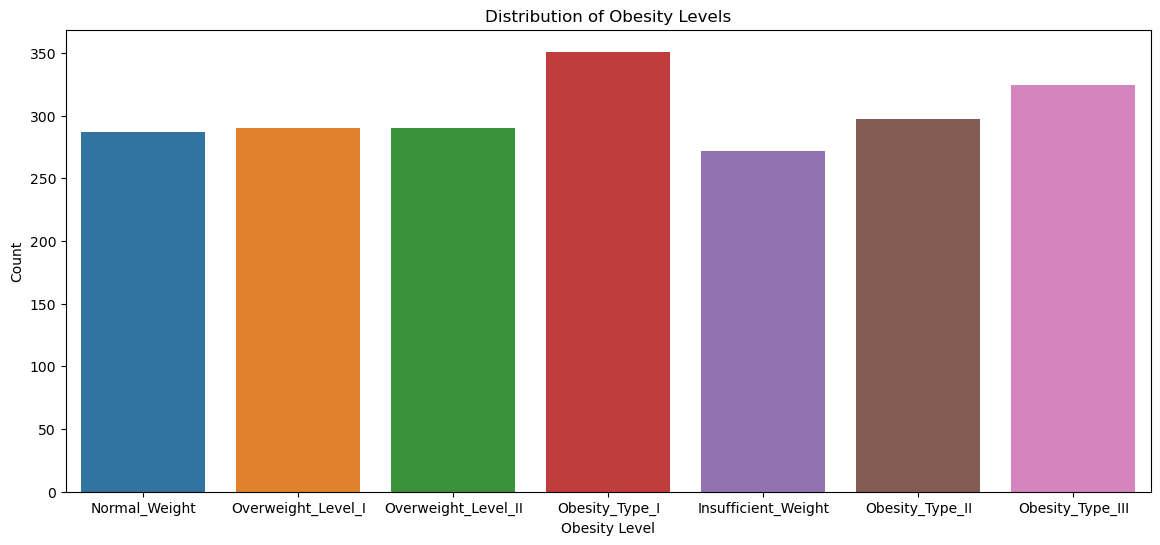

In [20]:
# Visualize the distribution of the target variable
plt.figure(figsize=(14, 6)) 
sns.countplot(x='NObeyesdad', data=data)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

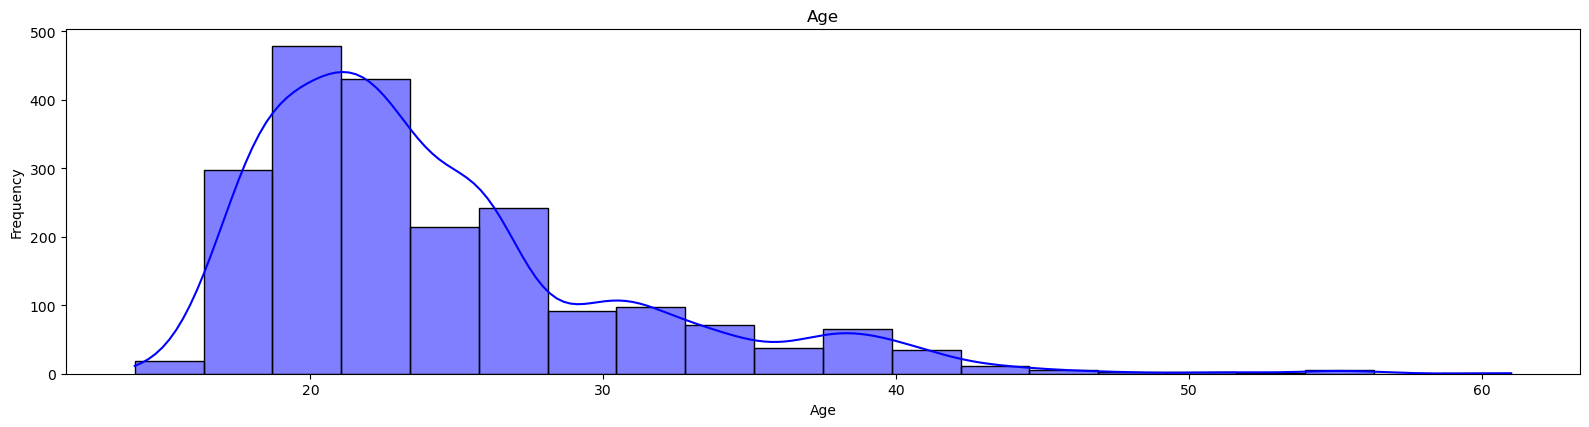

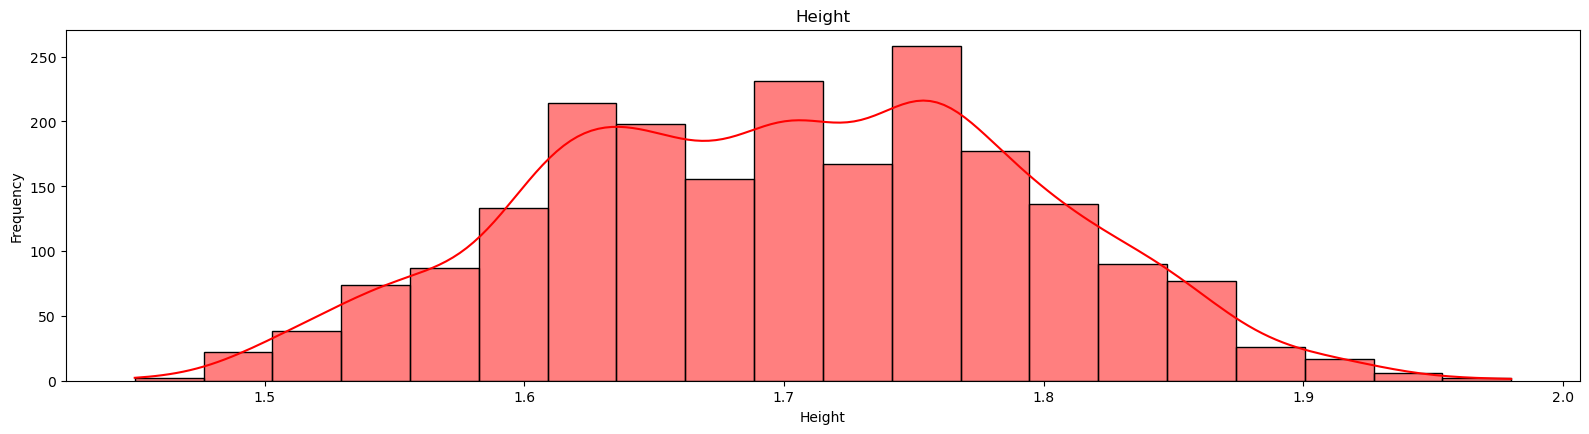

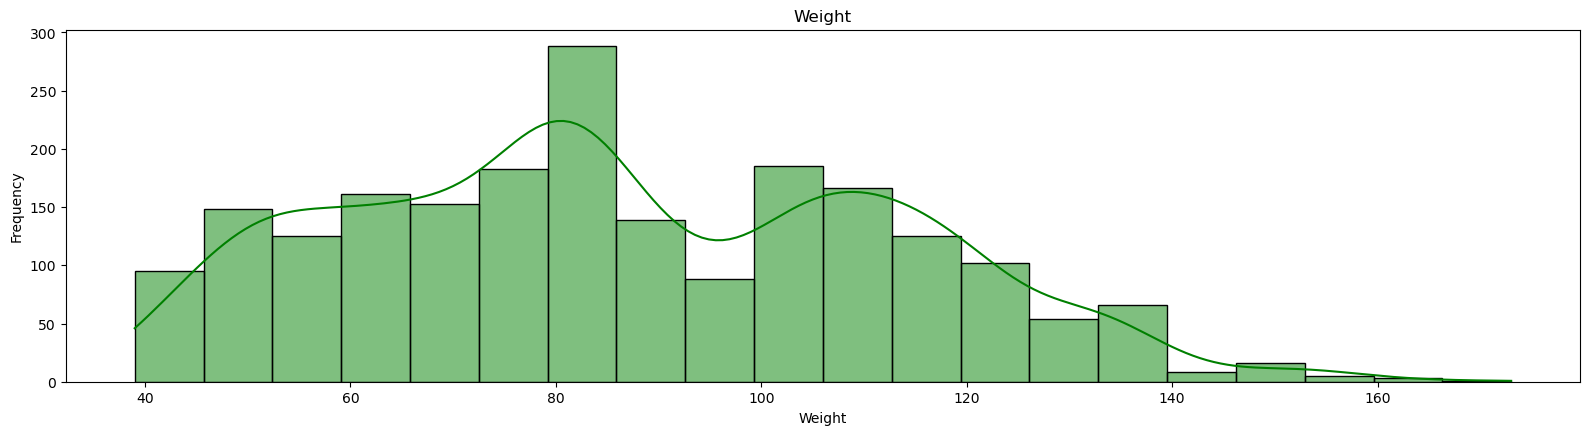

In [21]:
# Plot for Age
plt.figure(figsize=(16,12))
plt.subplot(3, 1, 1)
sns.histplot(data['Age'] ,color="b", bins=20, kde=True)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot for Height
plt.figure(figsize=(16,12))
plt.subplot(3, 1, 2)
sns.histplot(data['Height'],color="r", bins=20, kde=True)
plt.title('Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Plot for Weight
plt.figure(figsize=(16,12))
plt.subplot(3, 1, 3)
sns.histplot(data['Weight'],color="g" ,bins=20, kde=True)
plt.title('Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\mura2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


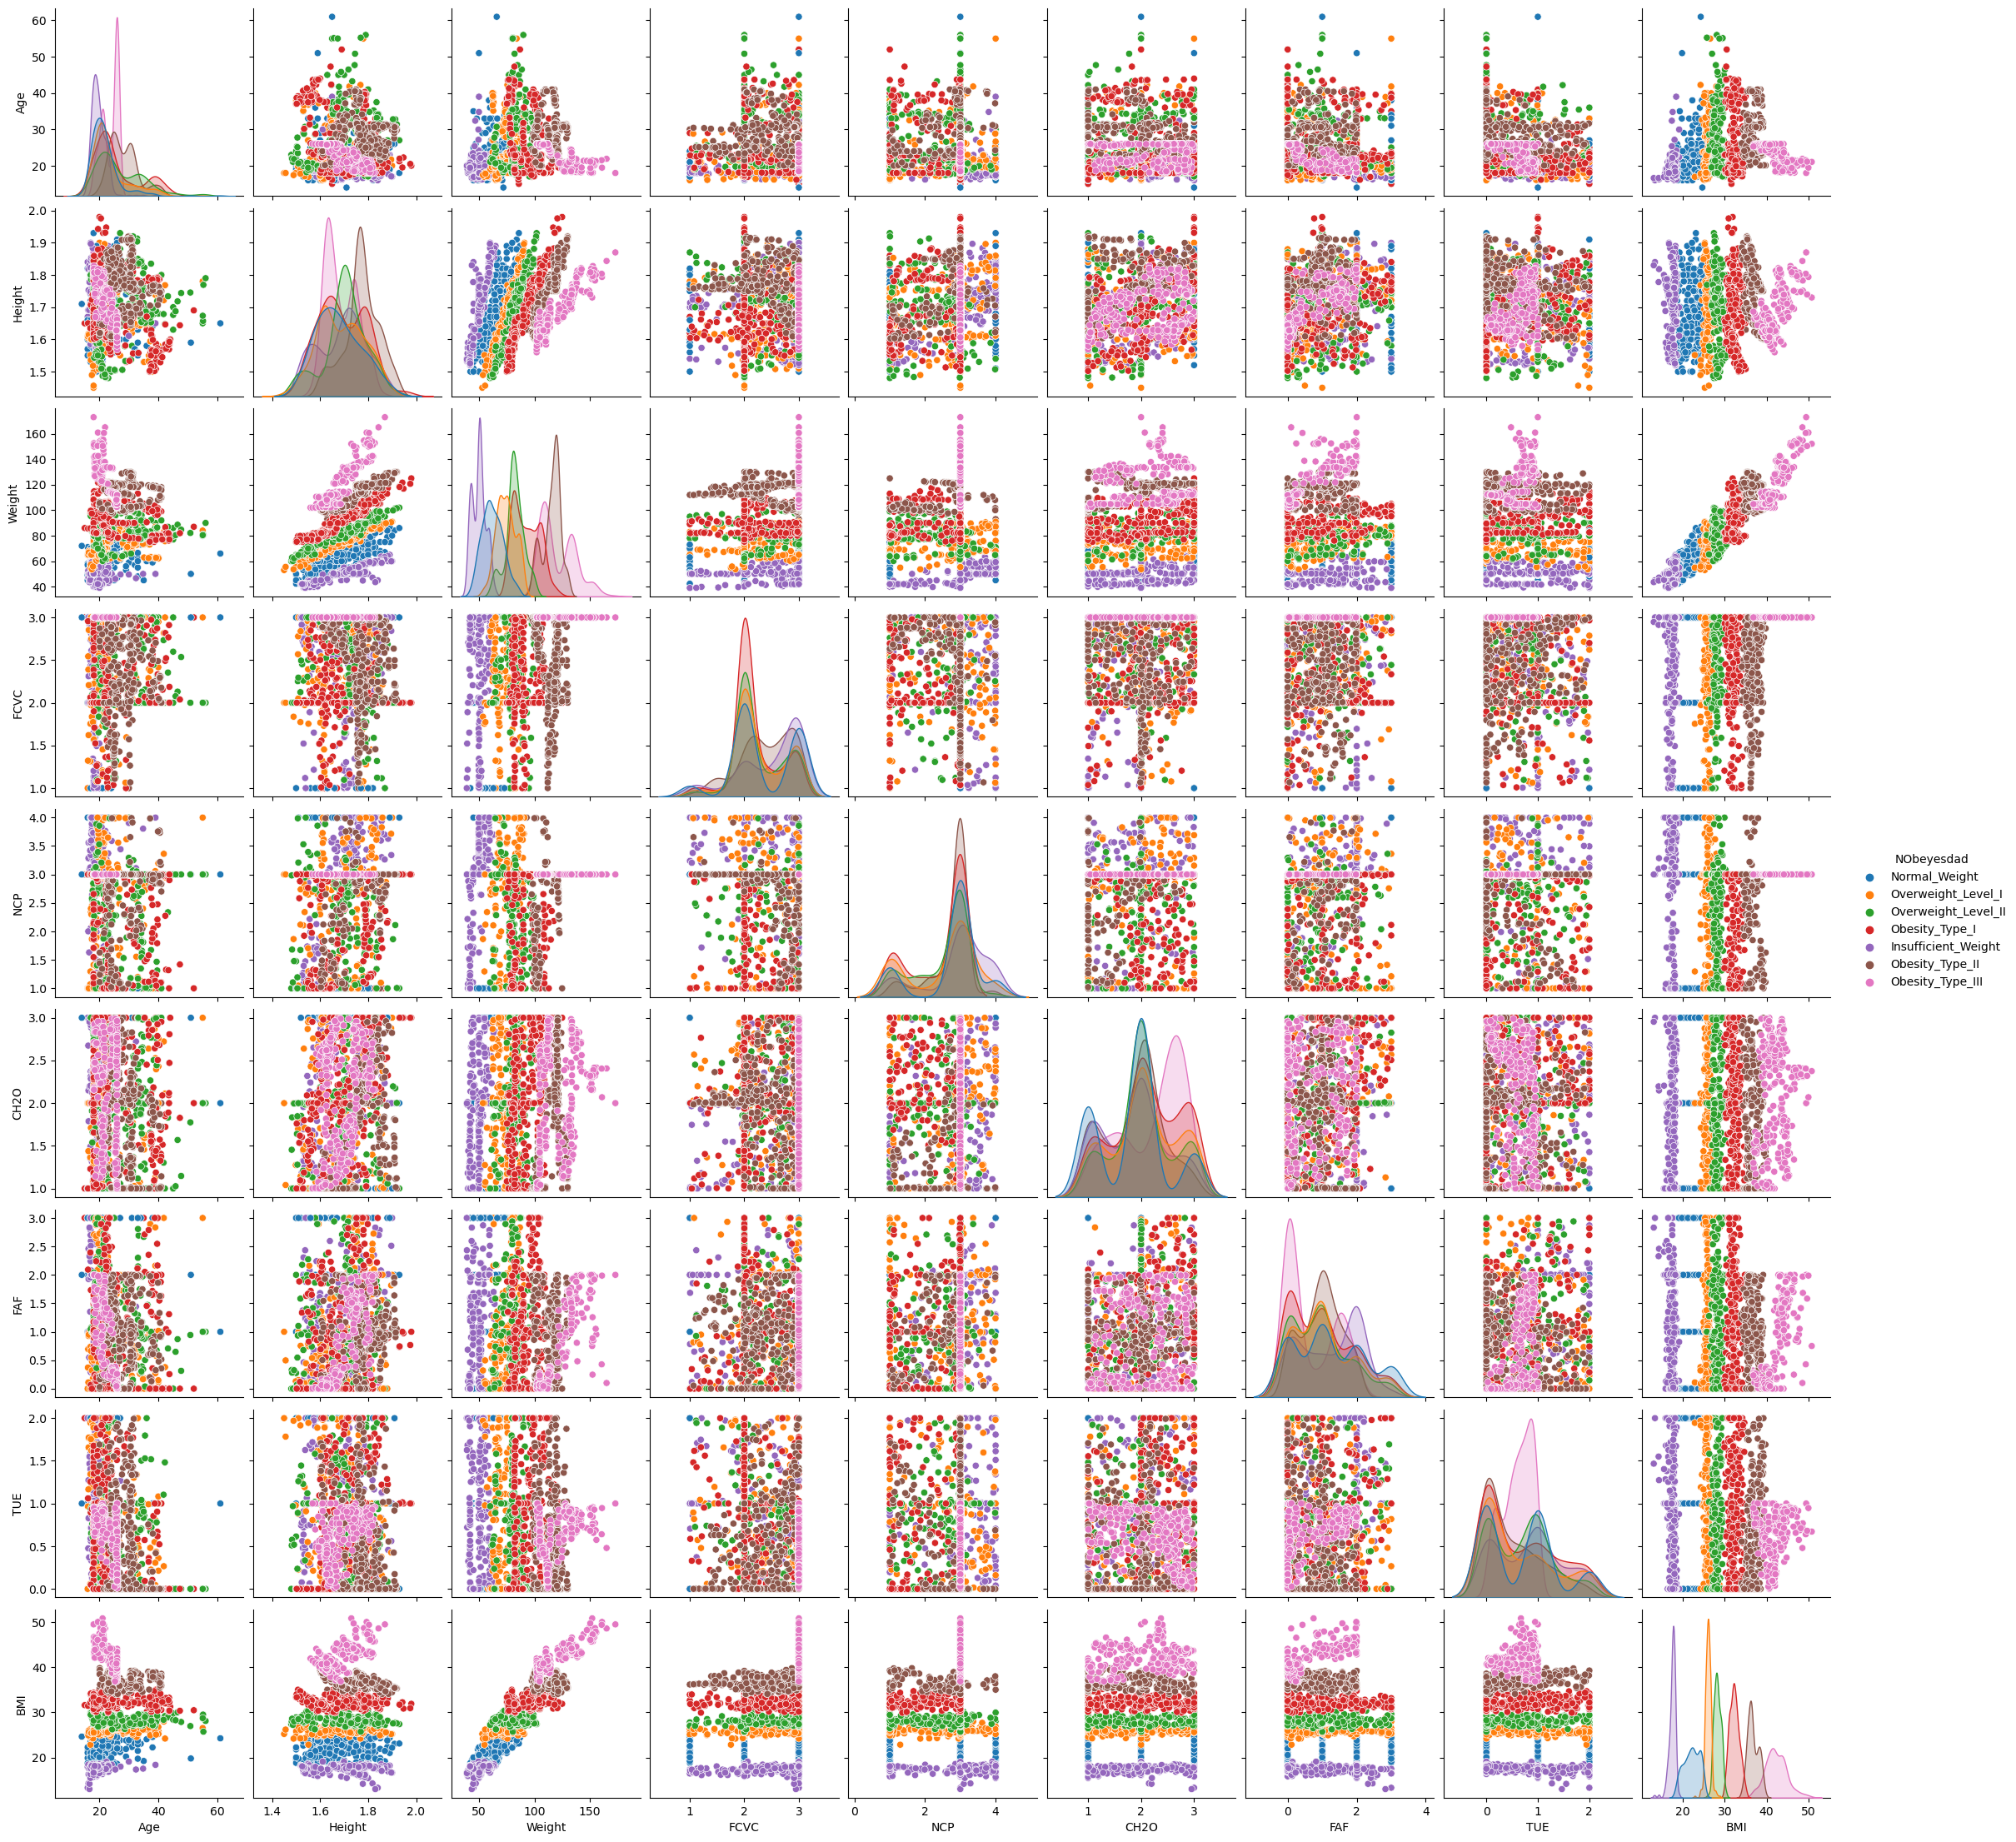

In [22]:
# Visualize the relationship between numerical features and the target variable
sns.pairplot(data, hue='NObeyesdad')
plt.show()


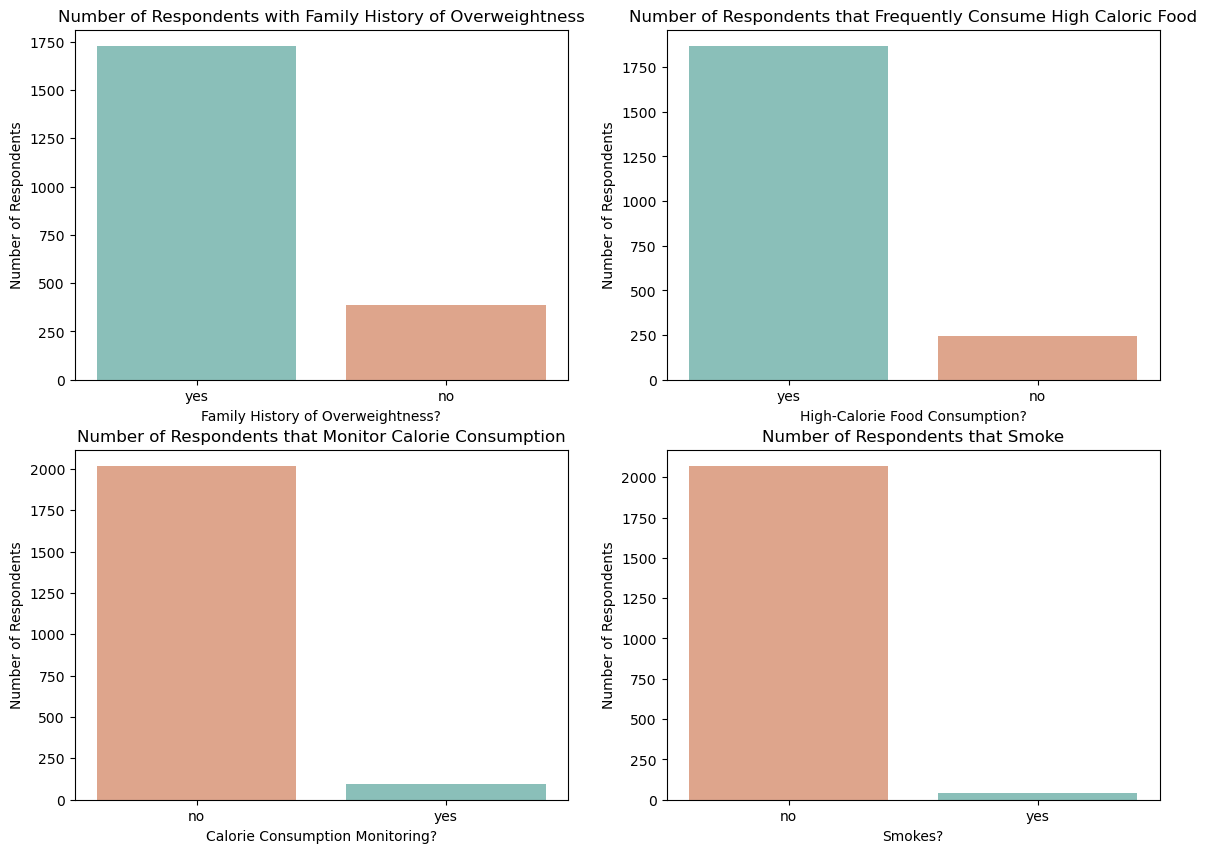

In [23]:
plt.figure(figsize=(14,10))

#Subplot regarding family history
plt.subplot(2, 2, 1)
plt.title("Number of Respondents with Family History of Overweightness")
counts = data["family_history_with_overweight"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8abfb9', '#dea58c'])
plt.xlabel("Family History of Overweightness?")
plt.ylabel("Number of Respondents")

#Subplot regarding consumption of high caloric food
plt.subplot(2, 2, 2)
plt.title("Number of Respondents that Frequently Consume High Caloric Food")
counts = data["FAVC"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8abfb9', '#dea58c'])
plt.xlabel("High-Calorie Food Consumption?")
plt.ylabel("Number of Respondents")

#Subplot regarding calorie monitoring
plt.subplot(2, 2, 3)
plt.title("Number of Respondents that Monitor Calorie Consumption")
counts = data["SCC"].value_counts()
plt.bar(counts.index, counts.values, color = ['#dea58c','#8abfb9'])
plt.xlabel("Calorie Consumption Monitoring?")
plt.ylabel("Number of Respondents")

#Subplot regarding smoking
plt.subplot(2, 2, 4)
plt.title("Number of Respondents that Smoke")
counts = data["SMOKE"].value_counts()
plt.bar(counts.index, counts.values, color = ['#dea58c','#8abfb9'])
plt.xlabel("Smokes?")
plt.ylabel("Number of Respondents")
plt.show()

In [24]:
smoke_counts = data['SMOKE'].value_counts()
print(smoke_counts)

SMOKE
no     2067
yes      44
Name: count, dtype: int64


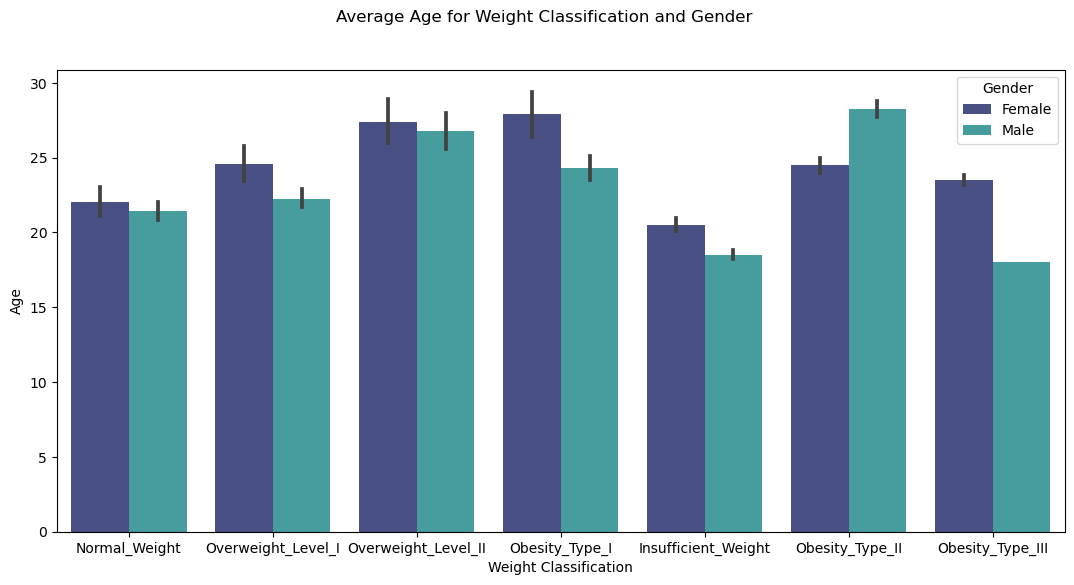

In [25]:
fig = plt.figure(figsize = (13, 6))
fig.suptitle("Average Age for Weight Classification and Gender")
sns.barplot(x=data.NObeyesdad ,y=data.Age, hue = data.Gender, palette = "mako")
plt.xlabel("Weight Classification")
plt.ylabel("Age")
plt.show()

Relation between Weight and Height

C:\Users\mura2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


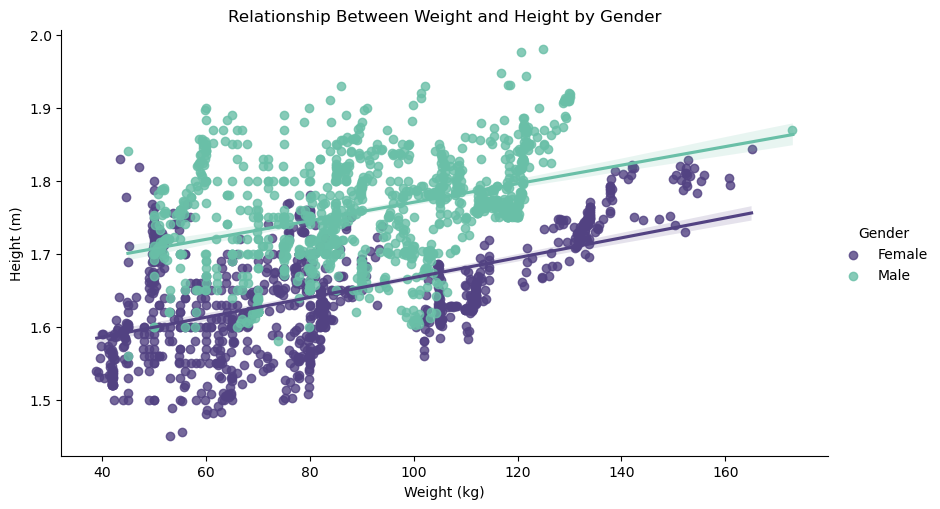

In [26]:
sns.lmplot(x="Weight", y="Height", hue="Gender", data=data,  
          palette=dict(Female="#524282", Male="#69bfa7"), height=5, aspect=1.7, x_jitter=.1)
plt.title('Relationship Between Weight and Height by Gender')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()

Relation between BMI and various factors

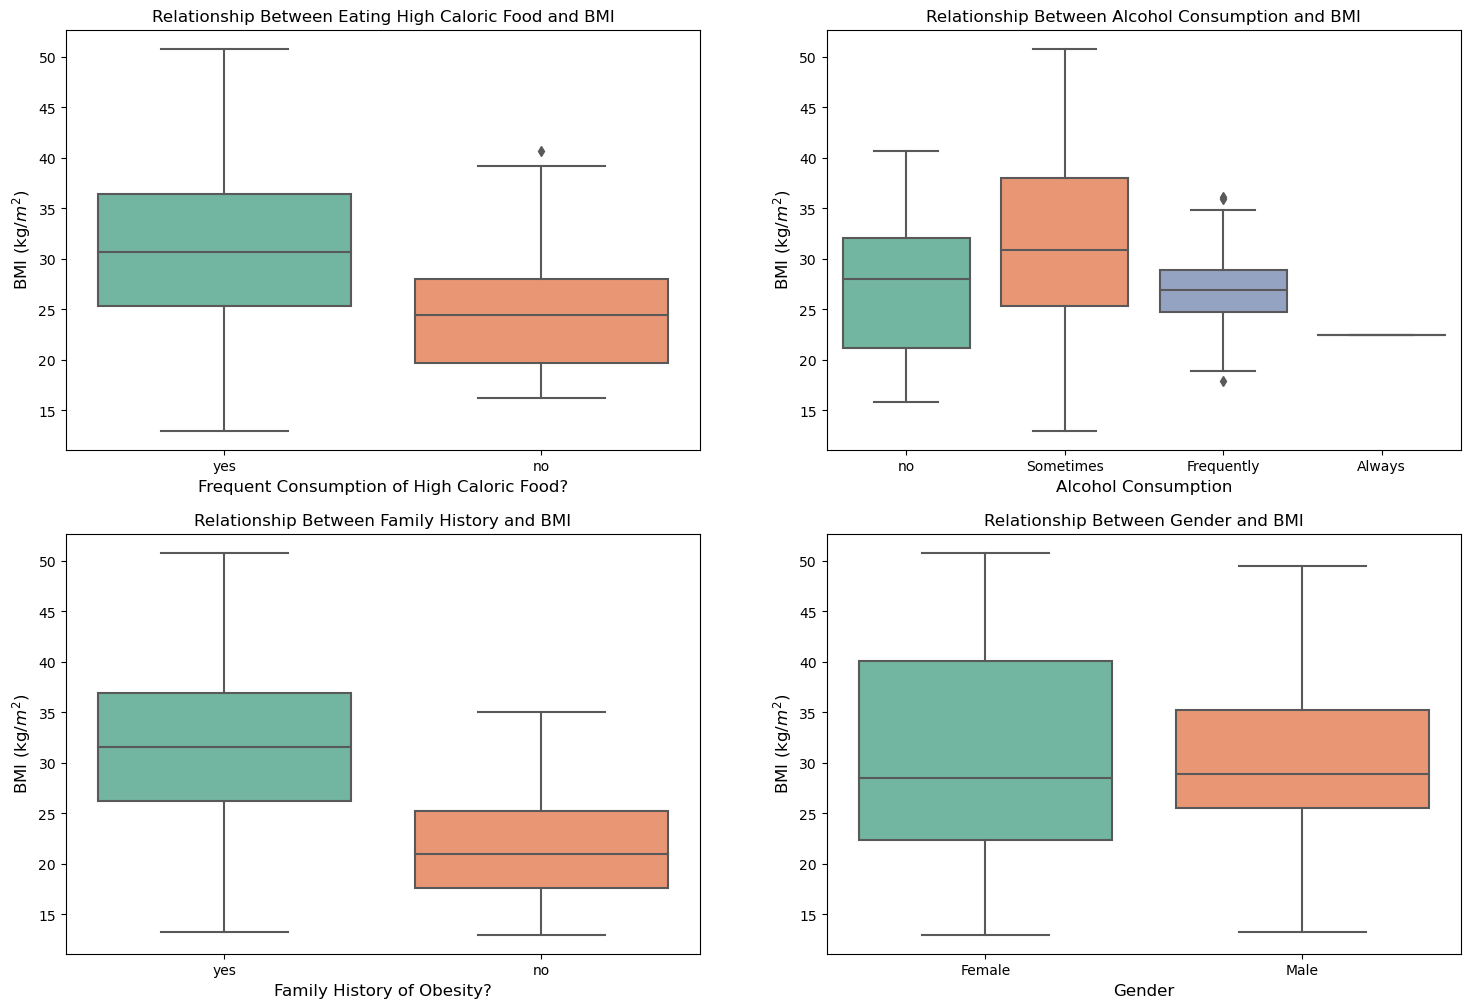

In [27]:
plt.figure(figsize=(18,12))

#subplot 1: high caloric food 
plt.subplot(2, 2, 1)
sns.boxplot(x = 'FAVC', y = 'BMI', order=["yes", "no"],data = data, palette = "Set2").set_title('Relationship Between Eating High Caloric Food and BMI')
plt.xlabel("Frequent Consumption of High Caloric Food?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 2: alcohol consumption
plt.subplot(2, 2, 2)
sns.boxplot(x = 'CALC', y = 'BMI', data = data, palette = "Set2").set_title('Relationship Between Alcohol Consumption and BMI')
plt.xlabel("Alcohol Consumption", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 3: family history
plt.subplot(2, 2, 3)
sns.boxplot(x = 'family_history_with_overweight', y = 'BMI', data = data, palette = "Set2").set_title('Relationship Between Family History and BMI')
plt.xlabel("Family History of Obesity?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 4: gender
plt.subplot(2, 2, 4)
sns.boxplot(x = 'Gender', y = 'BMI', data = data, palette = "Set2").set_title('Relationship Between Gender and BMI')
plt.xlabel("Gender", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

plt.show()

Individual’s movement habits and its impact with their BMI

Text(0, 0.5, 'BMI (kg/$m^2$)')

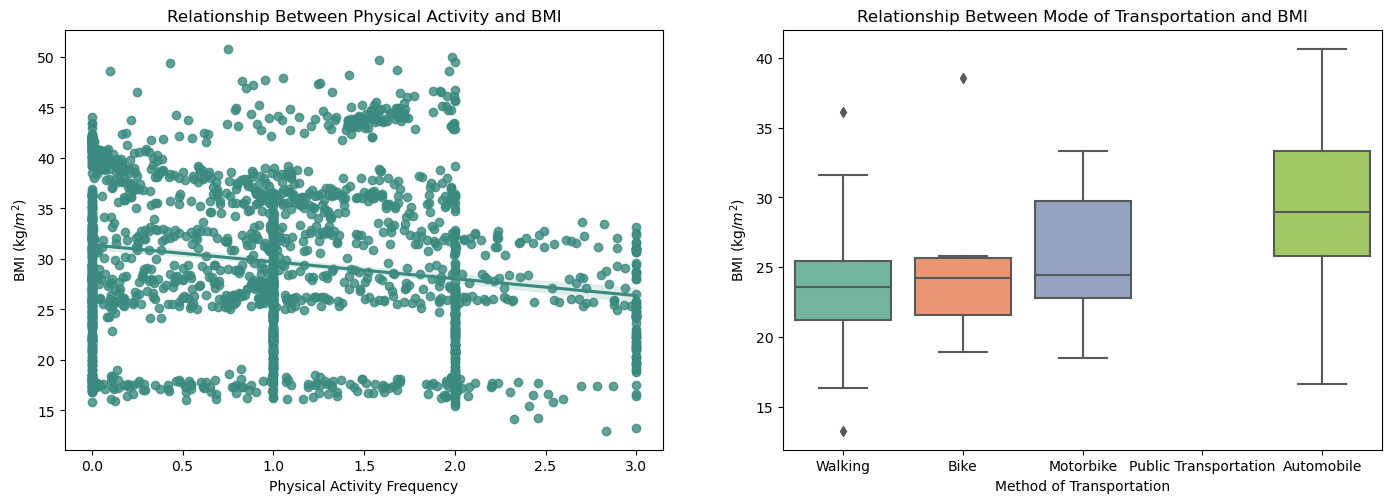

In [28]:
#subplot 1: physical activity and BMI
plt.figure(figsize=(17,12))
plt.subplot(2, 2, 1)
sns.regplot(x=data.FAF, y=data.BMI, color='#3b8a7f').set_title('Relationship Between Physical Activity and BMI')
plt.xlabel("Physical Activity Frequency")
plt.ylabel("BMI (kg/$m^2$)")

#subplot 2: transportation and BMI
plt.subplot(2, 2, 2)
sns.boxplot(x = 'MTRANS', y = 'BMI', data = data, order=["Walking","Bike","Motorbike","Public Transportation", "Automobile"], palette = "Set2").set_title('Relationship Between Mode of Transportation and BMI')
plt.xlabel("Method of Transportation")
plt.ylabel("BMI (kg/$m^2$)")

Correaltion Matrix

In [29]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   
BMI     0.244163  0.131785  0.934806  0.263651  0.039969  0.144200 -0.177537   

             TUE       BMI  
Age    -0.296931  0.244163  
Height  0.051912  0.131785  
Weight -0.071561  0.934806  
FCVC   -0.101135  0.263651  
NCP     0.036326  0.039969  
CH2O 

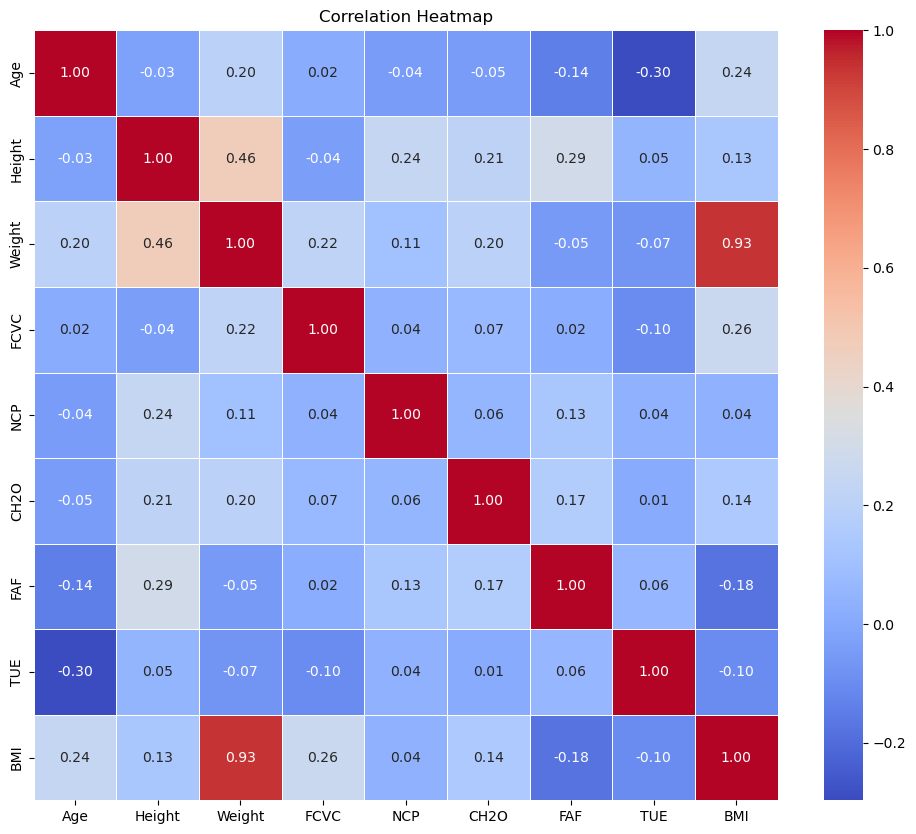

In [30]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# 3: Model Building


In [31]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


In [32]:
# Display the column names after encoding
print(data_encoded.columns)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


In [33]:
# Split the data into features and target variable
X = data_encoded.drop(['NObeyesdad_Normal_Weight',
                       'NObeyesdad_Obesity_Type_I',
                       'NObeyesdad_Obesity_Type_II',
                       'NObeyesdad_Obesity_Type_III',
                       'NObeyesdad_Overweight_Level_I',
                       'NObeyesdad_Overweight_Level_II'], axis=1)
y = data_encoded['NObeyesdad_Normal_Weight']


In [34]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can proceed with model building using various algorithms like Logistic Regression, Decision Trees, etc.


In [35]:
X_train

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
162   21.000000  1.630000   60.000000  3.000000  3.000000  2.000000  2.000000   
2001  20.924956  1.752531  133.618706  3.000000  3.000000  2.887659  1.480919   
1435  22.899740  1.661715   82.595793  1.203754  1.355354  2.765593  0.128342   
649   21.837996  1.588046   44.236067  3.000000  1.696080  2.550307  1.098862   
1280  25.994746  1.811602  106.042142  3.000000  3.000000  2.858171  1.813318   
...         ...       ...         ...       ...       ...       ...       ...   
1638  32.290160  1.754956  120.098812  2.967300  3.000000  2.530035  0.955317   
1095  23.000000  1.718981   81.669950  2.000000  1.729553  1.400247  0.887923   
1130  22.989846  1.650000   80.000000  2.000000  3.000000  2.000000  0.146919   
1294  23.000000  1.628168   84.497980  2.058687  2.962004  2.010596  0.851059   
860   20.000000  1.817480   85.000000  2.951180  3.000000  3.000000  2.433918   

           TUE        BMI  Gender_Male  ...  CAEC_no  SMOKE_yes  SCC_yes  \
162   0.000000  22.582709        False  ...    False       True    False   
2001  0.779641  43.504667        False  ...    False      False    False   
1435  1.659476  29.911958        False  ...    False      False    False   
649   0.000000  17.540839        False  ...    False      False    False   
1280  0.680215  32.311187         True  ...    False      False    False   
...        ...        ...          ...  ...      ...        ...      ...   
1638  1.339232  38.994760         True  ...    False      False    False   
1095  1.011983  27.638861         True  ...    False      False    False   
1130  2.000000  29.384757        False  ...    False      False    False   
1294  0.630866  31.874831        False  ...    False      False    False   
860   0.561602  25.732362         True  ...    False      False    False   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
162             False            True    False        False             False   
2001            False            True    False        False             False   
1435            False            True    False        False             False   
649             False           False     True        False             False   
1280            False            True    False        False             False   
...               ...             ...      ...          ...               ...   
1638            False            True    False        False             False   
1095            False            True    False        False             False   
1130            False           False     True        False             False   
1294            False           False     True        False             False   
860             False            True    False        False             False   

      MTRANS_Public_Transportation  MTRANS_Walking  
162                           True           False  
2001                          True           False  
1435                          True           False  
649                           True           False  
1280                          True           False  
...                            ...             ...  
1638                         False           False  
1095                          True           False  
1130                          True           False  
1294                          True           False  
860                           True           False  

[1688 rows x 24 columns]

In [36]:
X_train.shape, y_train.shape

((1688, 24), (1688,))

In [37]:
# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy of Logistic Regression:", accuracy_logistic_regression)

# Classification report
print(classification_report(y_test, y_pred_logistic_regression))


Accuracy of Logistic Regression: 0.8605200945626478
              precision    recall  f1-score   support

       False       0.87      0.99      0.92       361
        True       0.64      0.11      0.19        62

    accuracy                           0.86       423
   macro avg       0.75      0.55      0.56       423
weighted avg       0.83      0.86      0.82       423



C:\Users\mura2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Modelling

In [38]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [39]:
logistic_eval=evaluate_model(logistic_regression_model,X_train,y_train)
print('Accuracy:', logistic_eval['acc'])
print('Precision:', logistic_eval['prec'])
print('Recall:', logistic_eval['rec'])
print('F1 Score:', logistic_eval['f1'])
print('Cohens Kappa Score:', logistic_eval['kappa'])
print('Area Under Curve:', logistic_eval['auc'])
print('Confusion Matrix:\n', logistic_eval['cm'])

Accuracy: 0.8761848341232228
Precision: 0.6025641025641025
Recall: 0.2088888888888889
F1 Score: 0.31023102310231027
Cohens Kappa Score: 0.2594066722086471
Area Under Curve: 0.8865375560112402
Confusion Matrix:
 [[1432   31]
 [ 178   47]]


In [40]:
# Create a decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy of Decision Tree:", accuracy_decision_tree)

# Classification report
print(classification_report(y_test, y_pred_decision_tree))


Accuracy of Decision Tree: 0.9810874704491725
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       361
        True       0.91      0.97      0.94        62

    accuracy                           0.98       423
   macro avg       0.95      0.98      0.96       423
weighted avg       0.98      0.98      0.98       423



In [41]:
# Assuming you have already trained and tested your decision tree model
decision_tree_eval = evaluate_model(decision_tree_model, X_test, y_test)

# Print evaluation metrics
print('Accuracy:', decision_tree_eval['acc'])
print('Precision:', decision_tree_eval['prec'])
print('Recall:', decision_tree_eval['rec'])
print('F1 Score:', decision_tree_eval['f1'])
print('Cohens Kappa Score:', decision_tree_eval['kappa'])
print('Area Under Curve:', decision_tree_eval['auc'])
print('Confusion Matrix:\n', decision_tree_eval['cm'])

Accuracy: 0.9810874704491725
Precision: 0.9090909090909091
Recall: 0.967741935483871
F1 Score: 0.9374999999999999
Cohens Kappa Score: 0.9263707571801567
Area Under Curve: 0.9755607184344562
Confusion Matrix:
 [[355   6]
 [  2  60]]


# Conclusion

This data analysis suggests that factors such as a family history of obesity and eating high-calorie food can strongly influence weight classification, while other factors such as age had less influence, and factors such as gender had no influence.